In [3]:
library("ape")
library("phylogram")
library("dendextend")
library(tidyverse)
library(data.table)

Registered S3 method overwritten by 'dendextend':
  method              from     
  as.dendrogram.phylo phylogram


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:phylogram’:

    prune


The following objects are masked from ‘package:ape’:

    ladderize, rotate


The following object is masked from ‘package:stats’:

    cutree


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dply

In [2]:
install.packages(c("phylogram", "dendextend", "tidyverse"))

also installing the dependencies ‘highr’, ‘markdown’, ‘knitr’, ‘tinytex’, ‘xfun’, ‘DBI’, ‘blob’, ‘fs’, ‘rmarkdown’, ‘whisker’, ‘selectr’, ‘dbplyr’, ‘lubridate’, ‘modelr’, ‘reprex’, ‘rvest’, ‘xml2’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [9]:
abundances <- fread("/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/647_coverages_and_abundances.tsv")


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


The following object is masked from ‘package:dendextend’:

    set




In [62]:
### Test analysis on PALSA


# 1: Read in trees from parsnp from consensus genomes on MAGs with very different abundances but seem to be highly correlated
tree.P1M.3 <- read.tree("/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/00-lorikeet_out/02-palsa/73.20110800_P1M.3/parsnp_out/parsnp.tree")
tree.P1D.1 <- read.tree("/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/00-lorikeet_out/02-palsa/73.20110600_P1D.1/parsnp_out/parsnp.tree")

#compute the pairwise distances between the pairs of tips from a phylogenetic tree using its branch lengths 
tree.P1M.3.distances <- cophenetic(tree.P1M.3)
tree.P1D.1.distances <- cophenetic(tree.P1D.1)

In [63]:
samples <- 
lapply(tree.P1M.3$tip.label, function(x) {
    strsplit(x, ".tmpbfqRKH.")[[1]][2]
})
samples <- 
lapply(samples, function(x) {
    str_replace(x, ".fna", "")
})
samples <- 
lapply(samples, function(x) {
    str_replace(x, ".ref", "")
})
samples

[[1]]
[1] "20170700_P33.1.fq.gz"

[[2]]
[1] "20150700_P33.1.fq.gz"

[[3]]
[1] "20160700_P31.1.fq.gz"

[[4]]
[1] "20160700_P23.1.fq.gz"

[[5]]
[1] "20150700_P35.1.fq.gz"

[[6]]
[1] "20160700_P34.1.fq.gz"

[[7]]
[1] "20170700_P14.1.fq.gz"

[[8]]
[1] "20160700_P15.1.fq.gz"

[[9]]
[1] "20170700_P34.1.fq.gz"

[[10]]
[1] "20150700_P24.1.fq.gz"

[[11]]
[1] "20130700_P1Y.1.fq.gz"

[[12]]
[1] "20160700_P24.1.fq.gz"

[[13]]
[1] "20170700_P21.1.fq.gz"

[[14]]
[1] "20160700_P33.1.fq.gz"

[[15]]
[1] "20170700_P11.1.fq.gz"

[[16]]
[1] "20150700_P25.1.fq.gz"

[[17]]
[1] "20160700_P25.1.fq.gz"

[[18]]
[1] "20160700_P11.1.fq.gz"

[[19]]
[1] "20150700_P11.1.fq.gz"

[[20]]
[1] "20160700_P21.1.fq.gz"

[[21]]
[1] "20150700_P34.1.fq.gz"

[[22]]
[1] "20150700_P23.1.fq.gz"

[[23]]
[1] "20150700_P14.1.fq.gz"

[[24]]
[1] "20150700_P15.1.fq.gz"

[[25]]
[1] "20170700_P23.1.fq.gz"

[[26]]
[1] "20170700_P13.1.fq.gz"

[[27]]
[1] "20150700_P13.1.fq.gz"

[[28]]
[1] "20150700_P21.1.fq.gz"

[[29]]
[1] "20150700_P31.1.fq.gz"

[[30]]
[1] "20160700_P13.1.fq.gz"

[[31]]
[1] "20170700_P31.1.fq.gz"

In [78]:
P1M.3_found
P1D.1_found

Genome,20110600_P1D.1.trim100.fa.gz Trimmed Mean,20110600_P1M.1.trim100.fa.gz Trimmed Mean,20110700_P1D.1.trim100.fa.gz Trimmed Mean,20110700_P1M.1.trim100.fa.gz Trimmed Mean,20110700_P2D.1.trim100.fa.gz Trimmed Mean,20110700_P3D.1.trim100.fa.gz Trimmed Mean,20110700_P3M.1.trim100.fa.gz Trimmed Mean,20110800_P1D.1.trim100.fa.gz Trimmed Mean,20110800_P1M.1.trim100.fa.gz Trimmed Mean,⋯,20160700_P15.1.fq.gz Trimmed Mean,20160700_P24.1.fq.gz Trimmed Mean,20160700_P34.1.fq.gz Trimmed Mean,20160700_P35.1.fq.gz Trimmed Mean,20170700_P11.1.fq.gz Trimmed Mean,20170700_P14.1.fq.gz Trimmed Mean,20170700_P23.1.fq.gz Trimmed Mean,20170700_P24.1.fq.gz Trimmed Mean,20170700_P33.1.fq.gz Trimmed Mean,20170700_P34.1.fq.gz Trimmed Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20110800_P1M.3.renamed_contigs,8.458696,0.2927454,10.08789,0.06574589,28.89609,0.1923301,0.06210433,17.37587,34.94998,⋯,0.5658324,0.1209171,0.2640593,7.738619,0.05677815,0.3091649,0.08921482,8.757066,0.07872196,0.8189104


Genome,20110600_P1D.1.trim100.fa.gz Trimmed Mean,20110600_P1M.1.trim100.fa.gz Trimmed Mean,20110700_P1D.1.trim100.fa.gz Trimmed Mean,20110700_P1M.1.trim100.fa.gz Trimmed Mean,20110800_P1D.1.trim100.fa.gz Trimmed Mean,20110800_P1M.1.trim100.fa.gz Trimmed Mean,20111000_P1M.1.trim100.fa.gz Trimmed Mean,20111000_P3D.1.trim100.fa.gz Trimmed Mean,20111000_P3M.1.trim100.fa.gz Trimmed Mean,⋯,20120600_P2D.1.trim100.fa.gz Trimmed Mean,20120600_P3M.1.trim100.fa.gz Trimmed Mean,20120700_P2S.1.trim100.fa.gz Trimmed Mean,20120700_P3D.1.trim100.fa.gz Trimmed Mean,20150700_P11.1.fq.gz Trimmed Mean,20150700_P13.1.fq.gz Trimmed Mean,20150700_P21.1.fq.gz Trimmed Mean,20150700_P31.1.fq.gz Trimmed Mean,20160700_P13.1.fq.gz Trimmed Mean,20170700_P34.1.fq.gz Trimmed Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20110600_P1D.1.renamed_contigs,91.55798,0.264115,153.2744,0.06648055,133.1758,7.204594,0.1454983,125.3735,7.16228,⋯,0.07598365,0.09900314,0.08857432,399.2228,0.1999009,0.2212135,0.3418479,0.1302424,0.0879939,0.1372183


In [97]:
#Need to figure out how to make the HP matrix (rectangular matrix with hosts as rows and parasites as columns)
#The matrix contains 1's when a host-parasite link has been observed between the host (row) and parasite (column), and 0's otherwise.
# These observations are derived from the abundance profiles derived by coverM
# A link is established if the two reference MAGs are seen together in that sample
# Info is also stored in tip labels, as they contain the sample which that consensus genome came from
trimmed_cols <- c("Genome", colnames(abundances)[grepl("Trimmed", colnames(abundances))])
trimmed_cols_p <- c("Genome", trimmed_cols[grepl("_P", trimmed_cols)])
trimmed_abundances_p <- abundances[Genome %like% "_P", ..trimmed_cols_p]

P1M.3 <- trimmed_abundances_p[Genome %like% '_P1S\\.4\\.',]
P1D.1 <- trimmed_abundances_p[Genome %like% '_P1S\\.10\\.',]

# Find the samples each MAG was present in
P1M.3_found <- P1M.3[, colSums(P1M.3 != 0) > 0, with = FALSE]
P1D.1_found <- P1D.1[, colSums(P1D.1 != 0) > 0, with = FALSE]


wanted <- full_join(P1M.3_found, P1D.1_found)
wanted
na.omit(t(wanted))
wanted <- data.table(t(na.omit(t(wanted))))
wanted
colnames(wanted)
# p_sum[, `:=`(SUM = rowSums(.SD, na.rm=T)), .SDcols=!c("Genome")]
# p_sum
# hp1 = read.csv("06-parsnp_trees/hp1.headers.txt", sep="\t", header = TRUE, row=1)
# hp1 = as.matrix(hp1)



Joining, by = c("Genome", "20110600_P1M.1.trim100.fa.gz Trimmed Mean", "20110600_P2S.1.trim100.fa.gz Trimmed Mean", "20110600_P3S.1.trim100.fa.gz Trimmed Mean", "20110700_P1M.1.trim100.fa.gz Trimmed Mean", "20110700_P1S.1.trim100.fa.gz Trimmed Mean", "20110700_P2M.1.trim100.fa.gz Trimmed Mean", "20110700_P2S.1.trim100.fa.gz Trimmed Mean", "20110700_P3M.1.trim100.fa.gz Trimmed Mean", "20110700_P3S.1.trim100.fa.gz Trimmed Mean", "20110800_P1S.1.trim100.fa.gz Trimmed Mean", "20110800_P3M.1.trim100.fa.gz Trimmed Mean", "20110800_P3S.1.trim100.fa.gz Trimmed Mean", "20111000_P1S.1.trim100.fa.gz Trimmed Mean", "20111000_P2S.1.trim100.fa.gz Trimmed Mean", "20111000_P3S.1.trim100.fa.gz Trimmed Mean", "20120500_P11.1.trim100.fa.gz Trimmed Mean", "20120500_P12.1.trim100.fa.gz Trimmed Mean", "20120500_P15.1.trim100.fa.gz Trimmed Mean", "20120500_P18.1.trim100.fa.gz Trimmed Mean", "20120500_P19.1.trim100.fa.gz Trimmed Mean", "20120500_P21.1.trim100.fa.gz Trimmed Mean", "20120500_P22.1.trim100.fa.gz

Genome,20110600_P1M.1.trim100.fa.gz Trimmed Mean,20110600_P2S.1.trim100.fa.gz Trimmed Mean,20110600_P3S.1.trim100.fa.gz Trimmed Mean,20110700_P1M.1.trim100.fa.gz Trimmed Mean,20110700_P1S.1.trim100.fa.gz Trimmed Mean,20110700_P2M.1.trim100.fa.gz Trimmed Mean,20110700_P2S.1.trim100.fa.gz Trimmed Mean,20110700_P3M.1.trim100.fa.gz Trimmed Mean,20110700_P3S.1.trim100.fa.gz Trimmed Mean,⋯,20170700_P13.1.fq.gz Trimmed Mean,20170700_P14.1.fq.gz Trimmed Mean,20170700_P21.1.fq.gz Trimmed Mean,20170700_P31.1.fq.gz Trimmed Mean,20170700_P33.1.fq.gz Trimmed Mean,20170700_P34.1.fq.gz Trimmed Mean,20110700_P3D.1.trim100.fa.gz Trimmed Mean,20120500_P14.1.trim100.fa.gz Trimmed Mean,20120800_P1D.1.trim100.fa.gz Trimmed Mean,20150700_P25.1.fq.gz Trimmed Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20110800_P1S.4.renamed_contigs,0.0000000,0.0000000,0.5367096,0.1346703,0.776623,0.1794240,1.874555,3.361561,7.816514,⋯,6.5601650,0.08219727,3.1463660,5.404814,8.039538,1.7502447,NA,NA,NA,NA
73.20110700_P1S.4.renamed_contigs,0.6304718,0.1719912,9.9002470,1.2288520,15.798786,0.1954693,2.132055,2.599585,7.297453,⋯,0.6362773,0.00000000,1.5241203,14.354741,5.507853,0.8897155,NA,NA,NA,NA
73.20110700_P1S.10.renamed_contigs,0.1123477,0.3468667,13.8438880,3.4456835,14.062414,0.1450539,1.204351,1.233914,3.450756,⋯,0.9574292,0.14729743,0.4157871,5.448148,2.981448,0.3656373,0.05717287,0.06403349,0.0844349,0.09596556


Genome,73.20110800_P1S.4.renamed_contigs,73.20110700_P1S.4.renamed_contigs,73.20110700_P1S.10.renamed_contigs
20110600_P1M.1.trim100.fa.gz Trimmed Mean,0.0000000,0.6304718,0.1123477
20110600_P2S.1.trim100.fa.gz Trimmed Mean,0.0000000,0.1719912,0.3468667
20110600_P3S.1.trim100.fa.gz Trimmed Mean,0.5367096,9.9002470,13.8438880
20110700_P1M.1.trim100.fa.gz Trimmed Mean,0.1346703,1.2288520,3.4456835
20110700_P1S.1.trim100.fa.gz Trimmed Mean,0.776623,15.798786,14.062414
20110700_P2M.1.trim100.fa.gz Trimmed Mean,0.1794240,0.1954693,0.1450539
20110700_P2S.1.trim100.fa.gz Trimmed Mean,1.874555,2.132055,1.204351
20110700_P3M.1.trim100.fa.gz Trimmed Mean,3.361561,2.599585,1.233914
20110700_P3S.1.trim100.fa.gz Trimmed Mean,7.816514,7.297453,3.450756
20110800_P1S.1.trim100.fa.gz Trimmed Mean,12.973548,1.553555,2.120529


Genome,20110600_P1M.1.trim100.fa.gz Trimmed Mean,20110600_P2S.1.trim100.fa.gz Trimmed Mean,20110600_P3S.1.trim100.fa.gz Trimmed Mean,20110700_P1M.1.trim100.fa.gz Trimmed Mean,20110700_P1S.1.trim100.fa.gz Trimmed Mean,20110700_P2M.1.trim100.fa.gz Trimmed Mean,20110700_P2S.1.trim100.fa.gz Trimmed Mean,20110700_P3M.1.trim100.fa.gz Trimmed Mean,20110700_P3S.1.trim100.fa.gz Trimmed Mean,⋯,20160700_P25.1.fq.gz Trimmed Mean,20160700_P31.1.fq.gz Trimmed Mean,20160700_P33.1.fq.gz Trimmed Mean,20160700_P34.1.fq.gz Trimmed Mean,20170700_P13.1.fq.gz Trimmed Mean,20170700_P14.1.fq.gz Trimmed Mean,20170700_P21.1.fq.gz Trimmed Mean,20170700_P31.1.fq.gz Trimmed Mean,20170700_P33.1.fq.gz Trimmed Mean,20170700_P34.1.fq.gz Trimmed Mean
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
73.20110800_P1S.4.renamed_contigs,0.0000000,0.0000000,0.5367096,0.1346703,0.776623,0.1794240,1.874555,3.361561,7.816514,⋯,1.502293,2.731193,2.998146,2.5500850,6.5601650,0.08219727,3.1463660,5.404814,8.039538,1.7502447
73.20110700_P1S.4.renamed_contigs,0.6304718,0.1719912,9.9002470,1.2288520,15.798786,0.1954693,2.132055,2.599585,7.297453,⋯,1.319022,0.527013,2.049461,0.5036653,0.6362773,0.00000000,1.5241203,14.354741,5.507853,0.8897155
73.20110700_P1S.10.renamed_contigs,0.1123477,0.3468667,13.8438880,3.4456835,14.062414,0.1450539,1.204351,1.233914,3.450756,⋯,1.140175,1.221375,2.019480,0.1235472,0.9574292,0.14729743,0.4157871,5.448148,2.981448,0.3656373


[1] "Genome"                                   
 [2] "20110600_P1M.1.trim100.fa.gz Trimmed Mean"
 [3] "20110600_P2S.1.trim100.fa.gz Trimmed Mean"
 [4] "20110600_P3S.1.trim100.fa.gz Trimmed Mean"
 [5] "20110700_P1M.1.trim100.fa.gz Trimmed Mean"
 [6] "20110700_P1S.1.trim100.fa.gz Trimmed Mean"
 [7] "20110700_P2M.1.trim100.fa.gz Trimmed Mean"
 [8] "20110700_P2S.1.trim100.fa.gz Trimmed Mean"
 [9] "20110700_P3M.1.trim100.fa.gz Trimmed Mean"
[10] "20110700_P3S.1.trim100.fa.gz Trimmed Mean"
[11] "20110800_P1S.1.trim100.fa.gz Trimmed Mean"
[12] "20110800_P3M.1.trim100.fa.gz Trimmed Mean"
[13] "20110800_P3S.1.trim100.fa.gz Trimmed Mean"
[14] "20111000_P1S.1.trim100.fa.gz Trimmed Mean"
[15] "20111000_P2S.1.trim100.fa.gz Trimmed Mean"
[16] "20111000_P3S.1.trim100.fa.gz Trimmed Mean"
[17] "20120500_P11.1.trim100.fa.gz Trimmed Mean"
[18] "20120500_P12.1.trim100.fa.gz Trimmed Mean"
[19] "20120500_P15.1.trim100.fa.gz Trimmed Mean"
[20] "20120500_P18.1.trim100.fa.gz Trimmed Mean"
[21] "20120500_P19.1.trim100.fa.gz Trimmed Mean"
[22] "20120500_P21.1.trim100.fa.gz Trimmed Mean"
[23] "20120500_P22.1.trim100.fa.gz Trimmed Mean"
[24] "20120500_P23.1.trim100.fa.gz Trimmed Mean"
[25] "20120500_P24.1.trim100.fa.gz Trimmed Mean"
[26] "20120500_P25.1.trim100.fa.gz Trimmed Mean"
[27] "20120500_P28.1.trim100.fa.gz Trimmed Mean"
[28] "20120500_P31.1.trim100.fa.gz Trimmed Mean"
[29] "20120500_P32.1.trim100.fa.gz Trimmed Mean"
[30] "20120600_P1D.1.trim100.fa.gz Trimmed Mean"
[31] "20120600_P1M.1.trim100.fa.gz Trimmed Mean"
[32] "20120600_P1S.1.trim100.fa.gz Trimmed Mean"
[33] "20120600_P2D.1.trim100.fa.gz Trimmed Mean"
[34] "20120600_P2M.1.trim100.fa.gz Trimmed Mean"
[35] "20120600_P2S.1.trim100.fa.gz Trimmed Mean"
[36] "20120600_P3D.1.trim100.fa.gz Trimmed Mean"
[37] "20120600_P3M.1.trim100.fa.gz Trimmed Mean"
[38] "20120600_P3S.1.trim100.fa.gz Trimmed Mean"
[39] "20120700_P1M.1.trim100.fa.gz Trimmed Mean"
[40] "20120700_P1S.1.trim100.fa.gz Trimmed Mean"
[41] "20120700_P2M.1.trim100.fa.gz Trimmed Mean"
[42] "20120700_P2S.1.trim100.fa.gz Trimmed Mean"
[43] "20120700_P3D.1.trim100.fa.gz Trimmed Mean"
[44] "20120700_P3M.1.trim100.fa.gz Trimmed Mean"
[45] "20120700_P3S.1.trim100.fa.gz Trimmed Mean"
[46] "20120800_P1M.1.trim100.fa.gz Trimmed Mean"
[47] "20120800_P1S.1.trim100.fa.gz Trimmed Mean"
[48] "20120800_P2M.1.trim100.fa.gz Trimmed Mean"
[49] "20120800_P2S.1.trim100.fa.gz Trimmed Mean"
[50] "20120800_P3M.1.trim100.fa.gz Trimmed Mean"
[51] "20150700_P11.1.fq.gz Trimmed Mean"        
[52] "20150700_P13.1.fq.gz Trimmed Mean"        
[53] "20150700_P14.1.fq.gz Trimmed Mean"        
[54] "20150700_P15.1.fq.gz Trimmed Mean"        
[55] "20150700_P21.1.fq.gz Trimmed Mean"        
[56] "20150700_P23.1.fq.gz Trimmed Mean"        
[57] "20150700_P24.1.fq.gz Trimmed Mean"        
[58] "20150700_P31.1.fq.gz Trimmed Mean"        
[59] "20150700_P33.1.fq.gz Trimmed Mean"        
[60] "20150700_P34.1.fq.gz Trimmed Mean"        
[61] "20160700_P11.1.fq.gz Trimmed Mean"        
[62] "20160700_P13.1.fq.gz Trimmed Mean"        
[63] "20160700_P15.1.fq.gz Trimmed Mean"        
[64] "20160700_P21.1.fq.gz Trimmed Mean"        
[65] "20160700_P25.1.fq.gz Trimmed Mean"        
[66] "20160700_P31.1.fq.gz Trimmed Mean"        
[67] "20160700_P33.1.fq.gz Trimmed Mean"        
[68] "20160700_P34.1.fq.gz Trimmed Mean"        
[69] "20170700_P13.1.fq.gz Trimmed Mean"        
[70] "20170700_P14.1.fq.gz Trimmed Mean"        
[71] "20170700_P21.1.fq.gz Trimmed Mean"        
[72] "20170700_P31.1.fq.gz Trimmed Mean"        
[73] "20170700_P33.1.fq.gz Trimmed Mean"        
[74] "20170700_P34.1.fq.gz Trimmed Mean"

In [183]:

# 1: Read in trees from parsnp from consensus genomes on MAGs with very different abundances but seem to be highly correlated
tree.S2D.10 <- read.tree("/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/00-lorikeet_out/03-stordalenmirensis_polish/00-mflorens/parsnp_out/parsnp.tree")
tree.S2D.20 <- read.tree("/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/00-lorikeet_out/03-stordalenmirensis_polish/01-aflorens/parsnp_out/parsnp.tree")

#compute the pairwise distances between the pairs of tips from a phylogenetic tree using its branch lengths 
tree.S2D.10.distances <- cophenetic(tree.S2D.10)
tree.S2D.20.distances <- cophenetic(tree.S2D.20)

S2D.10_samples <- lapply(rownames(tree.S2D.10.distances), function(x) {
    strsplit(x, ".tmpAwya43.")[[1]][2]
})

S2D.10_samples <- 
lapply(S2D.10_samples, function(x) {
    str_replace(x, ".fna", " Trimmed Mean")
})

S2D.10_samples <- 
lapply(S2D.10_samples, function(x) {
    ifelse(is.na(x), "ref", x)
})
S2D.10_samples <- unlist(S2D.10_samples)

S2D.20_samples <- lapply(rownames(tree.S2D.20.distances), function(x) {
    strsplit(x, ".tmpAwya43.")[[1]][2]
})

S2D.20_samples <- 
lapply(S2D.20_samples, function(x) {
    str_replace(x, ".fna", " Trimmed Mean")
})

S2D.20_samples <- 
lapply(S2D.20_samples, function(x) {
    ifelse(is.na(x), "ref", x)
})
S2D.20_samples <- unlist(S2D.20_samples)



tree.S2D.10$tip.label <- S2D.10_samples
tree.S2D.20$tip.label <- S2D.20_samples

In [204]:
## Pull out only the "Sphagnum" samples from the coverage matrix
trimmed_cols <- c("Genome", colnames(abundances)[grepl("Trimmed", colnames(abundances))])
trimmed_cols_s <- c("Genome", trimmed_cols[grepl("_S", trimmed_cols)])

## get the coverage values for host and parasite and add dummy column for reference for the MAGs of interest
S2D.20 <- trimmed_abundances_s[Genome %like% 'S2D.20.',][, ref:=1]
S2D.10 <- trimmed_abundances_s[Genome %like% 'S2D.10.',][, ref:=1]

## Melt the data tables so we have sample name next to the abudnance
S2D.20_melt <- melt(S2D.20[, ..S2D.20_samples])
S2D.10_melt <- melt(S2D.10[, ..S2D.10_samples])

colnames(S2D.20_melt)

## Function to make HP matrix from melted coverage tables
## Rows are host and columns are parasite
make_HP_matrix <- function (host, para) 
{
    stopifnot(is.data.table(host), is.data.table(para))
    hostnames <- host$variable
    collect1 <- data.frame(para=rep(0, 63))
    for (parax in para$variable) {
        collect1$para <- unlist(lapply(hostnames, function(hostx){
            prevalence <- ifelse(para[variable==parax, ]$value / host[variable==hostx, ]$value > 1, 
                                 1, 
                                 para[variable==parax, ]$value / host[variable==hostx, ]$value)
#             is.na(prevalence) <- 0
            ifelse(hostx==parax, 
                   ifelse(is.na(prevalence), 0, 
                          ifelse(is.infinite(prevalence), 0, 
                                 prevalence)), 0)}))
        names(collect1)[names(collect1) == "para"] <- parax
    }
    rownames(collect1) <- hostnames
    collect1
}



Warning message in melt.data.table(S2D.20[, ..S2D.20_samples]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(S2D.10[, ..S2D.10_samples]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”


[1] "variable" "value"

In [205]:
## Testing for coevolution
## 
hp_matrix_AM <- make_HP_matrix(S2D.20_melt, S2D.10_melt)
colnames(hp_matrix_AM) <- colnames(tree.S2D.10.distances)
rownames(hp_matrix_AM) <- rownames(tree.S2D.20.distances)
hp_matrix_AM <- as.matrix(hp_matrix_AM)

any(is.infinite(hp_matrix_AM))
any(is.nan(hp_matrix_AM))
any(is.na(hp_matrix_AM))
#Test host-parasite coevolution 
parafit(tree.S2D.20.distances, tree.S2D.10.distances, hp_matrix_AM, nperm = 1000, test.links = TRUE, correction = "cailliez")

[1] FALSE

[1] FALSE

[1] FALSE

n.hosts = 63 , n.parasites = 63 
The function cannot check if matrix HP has been entered in the right way. 
It will assume that the rows of HP are the hosts. 
Computation time = 56.203000  sec 



Test of host-parasite coevolution 
 
Global test:  ParaFitGlobal = 491.0174 , p-value = 0.000999001 ( 1000 permutations) 
 
There are 47 host-parasite links in matrix HP 
 
Test of individual host-parasite links ( 1000 permutations) 
 
      Host Parasite     F1.stat        p.F1       F2.stat        p.F2
 [1,]    5       45  47.2426188 0.000999001  0.0203181121 0.000999001
 [2,]    6       51 -25.3009640 1.000000000 -0.0108814422 1.000000000
 [3,]    7       47  41.7744268 0.000999001  0.0179663514 0.000999001
 [4,]    9       24  35.2301730 0.000999001  0.0151517978 0.000999001
 [5,]   10       46  37.2543239 0.000999001  0.0160223448 0.000999001
 [6,]   14       21  11.6005854 0.000999001  0.0049891814 0.000999001
 [7,]   16       43  40.5334816 0.000999001  0.0174326454 0.000999001
 [8,]   20       42  15.4417098 0.000999001  0.0066411727 0.000999001
 [9,]   22       22  16.5315519 0.001998002  0.0071098921 0.000999001
[10,]   23       44  23.8076074 0.000999001  0.0102391791 0.000

In [206]:
## Reverse HP matrix
hp_matrix_MA <- make_HP_matrix(S2D.10_melt, S2D.20_melt)
colnames(hp_matrix_MA) <- colnames(tree.S2D.20.distances)
rownames(hp_matrix_MA) <- rownames(tree.S2D.10.distances)
hp_matrix_MA <- as.matrix(hp_matrix_MA)

any(is.infinite(hp_matrix_MA))
any(is.nan(hp_matrix_MA))
any(is.na(hp_matrix_MA))
#Test host-parasite coevolution 
parafit(tree.S2D.10.distances, tree.S2D.20.distances, hp_matrix_MA, nperm = 1000, test.links = TRUE, correction = "cailliez")


[1] FALSE

[1] FALSE

[1] FALSE

n.hosts = 63 , n.parasites = 63 
The function cannot check if matrix HP has been entered in the right way. 
It will assume that the rows of HP are the hosts. 
Computation time = 63.976000  sec 



Test of host-parasite coevolution 
 
Global test:  ParaFitGlobal = 450.6895 , p-value = 0.000999001 ( 1000 permutations) 
 
There are 54 host-parasite links in matrix HP 
 
Test of individual host-parasite links ( 1000 permutations) 
 
      Host Parasite    F1.stat        p.F1       F2.stat        p.F2
 [1,]    1       41 15.3475286 0.000999001  0.0064881356 0.000999001
 [2,]    2       37 36.7765366 0.000999001  0.0155472040 0.000999001
 [3,]    3       56 25.1043289 0.000999001  0.0106128026 0.000999001
 [4,]    4       47 16.4834954 0.000999001  0.0069683632 0.000999001
 [5,]    5       45 21.6560676 0.000999001  0.0091550573 0.000999001
 [6,]    6       53 11.7677227 0.000999001  0.0049747802 0.000999001
 [7,]    7       52 16.8201787 0.000999001  0.0071106954 0.000999001
 [8,]    8       51 17.7613530 0.000999001  0.0075085748 0.000999001
 [9,]    9       34 11.0603100 0.000999001  0.0046757229 0.000999001
[10,]   10       46 26.0196478 0.001998002  0.0109997517 0.001998002
[11,

[1] 0.00351 0.01173 0.02100 0.02683 0.01453 0.07489 0.02501 0.03425 0.01778
 [10] 0.03264 0.07088 0.06226 0.02133 0.04119 0.03268 0.03971 0.02890 0.03251
 [19] 0.20505 0.04261 0.02583 0.02125 0.02124 0.07758 0.04514 0.04803 0.22792
 [28] 0.04740 0.08507 0.03054 0.01845 0.02496 0.03890 0.02519 0.03907 0.03902
 [37] 0.03558 0.09667 0.01796 0.03895 0.01126 0.01844 0.05390 0.09551 0.17232
 [46] 0.10199 0.24859 0.12428 0.16690 0.19806 0.14392 0.09324 0.18458 0.04847
 [55] 0.22763 0.03662 0.16697 0.03442 0.01634 0.00781 0.00168 0.00004 0.00032
 [64] 0.00295 0.04128 0.04935 0.04852 0.00183 0.03612 0.04041 0.00000 0.00000
 [73] 0.00037 0.00374 0.04200 0.00069 0.00918 0.02351 0.00000 0.00005 0.00367
 [82] 0.00356 0.00000 0.00010 0.01804 0.00185 0.04226 0.01941 0.00169 0.02236
 [91] 0.04420 0.01657 0.06880 0.17926 0.03294 0.22752 0.17298 0.02968 0.15580
[100] 0.18789 0.08977 0.03862 0.09230 0.04031 0.19041 0.16944 0.04032 0.04068
[109] 0.04076 0.02013 0.12043 0.01230 0.01168 0.02504 0.01464 0.04321 0.01242
[118] 0.00301 0.00885 0.11774 0.02609 0.11994 0.19858

[1] 0.03305 0.01130 0.02315 0.03604 0.04212 0.03077 0.04210 0.01523 0.02102
 [10] 0.00937 0.03664 0.17215 0.14245 0.05674 0.01944 0.00942 0.00636 0.01821
 [19] 0.10351 0.07098 0.00901 0.03274 0.04369 0.01427 0.05814 0.01885 0.09082
 [28] 0.01252 0.02298 0.10211 0.03332 0.16781 0.08534 0.01373 0.02761 0.09487
 [37] 0.12068 0.03547 0.15472 0.04019 0.05480 0.11206 0.07686 0.03362 0.25228
 [46] 0.05956 0.14581 0.08396 0.03996 0.04153 0.12108 0.03889 0.17189 0.04553
 [55] 0.29672 0.03210 0.04776 0.10788 0.07326 0.13056 0.12531 0.22859 0.13250
 [64] 0.08534 0.36999 0.00197 0.20675 0.09878 0.06708 0.07180 0.02446 0.03262
 [73] 0.00977 0.00534 0.00351 0.06691 0.00332 0.00873 0.00169 0.01535 0.00191
 [82] 0.00571 0.00083 0.00131 0.00141 0.00091 0.00094 0.00342 0.00392 0.00024
 [91] 0.00123 0.00074 0.00081 0.00121 0.00076 0.00032 0.00070 0.00152 0.01086
[100] 0.00088 0.00149 0.00203 0.00372 0.00170 0.00065 0.00170 0.00200 0.00193
[109] 0.00332 0.01069 0.04274 0.04775 0.03990 0.10123 0.17242 0.12583 0.22130
[118] 0.09870 0.00808 0.08975 0.01547 0.04994 0.02823

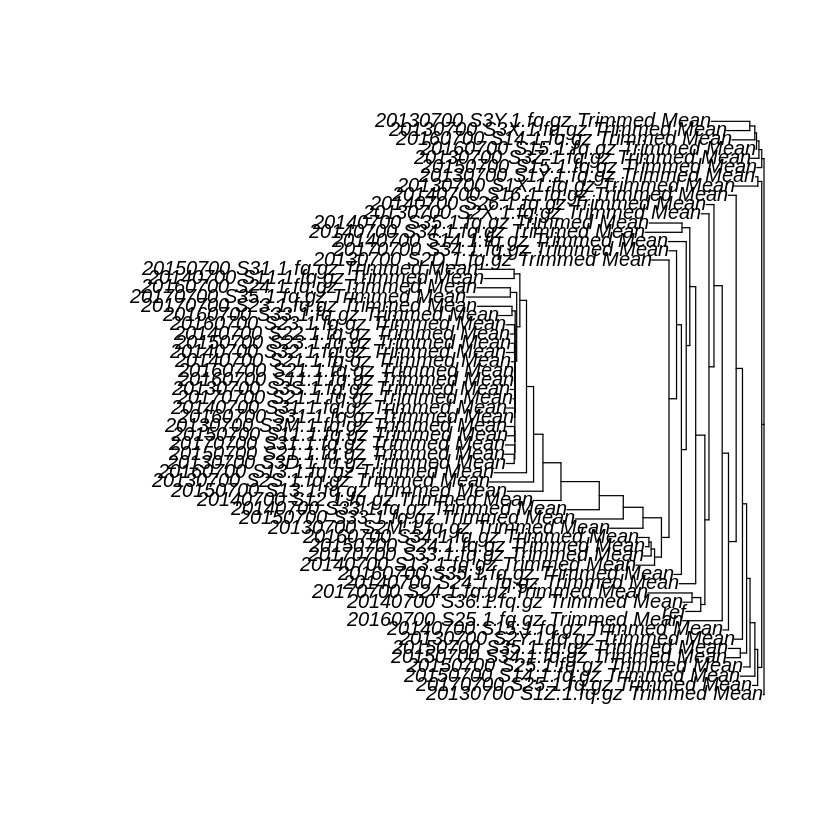


Setting initial dates...
Fitting in progress... get a first set of estimates
         (Penalised) log-lik = -111102054801 
Optimising rates... dates... -111102054801 


Warning message:
“false convergence (8)”



log-Lik = -1e+100 
PHIIC = 2e+100 

Setting initial dates...
Fitting in progress... get a first set of estimates


ERROR: Error in nlminb(start.para, f, g, control = opt.ctrl, lower = LOW, upper = UP): NA/NaN gradient evaluation


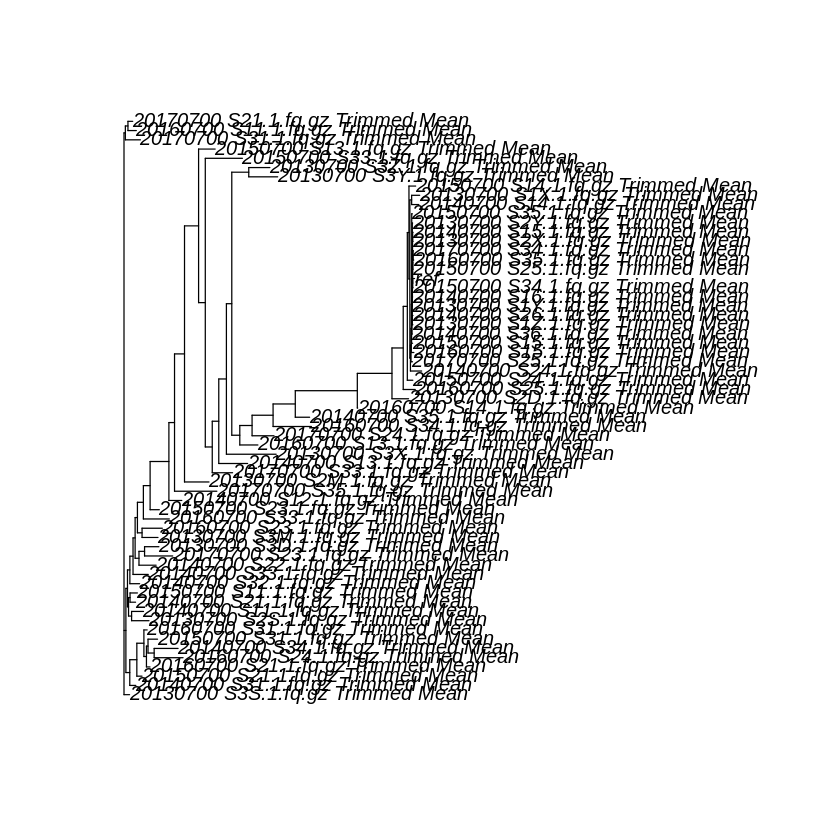

In [192]:
## Making Tanglegram
# ~~~~~~~~~~~~~~
tree.S2D.10$edge.length
tree.S2D.20$edge.length
#ploy the things
plot.phylo(tree.S2D.10, direction="leftwards")
plot.phylo(tree.S2D.20)

#makes the trees ultrametric 
S2D.10.ultra = chronos(tree.S2D.10)
S2D.20.ultra = chronos(tree.S2D.20)
S2D.10.ultra

#roots the tree 
S2D.10.ultra$root.edge = 0
S2D.20.ultra$root.edge = 0

#make binary 
S2D.10.ultra.binary = multi2di(S2D.10.ultra)
S2D.20.ultra.binary = multi2di(S2D.20.ultra)

#ploy the things
plot.phylo(S2D.10.ultra.binary, direction="leftwards")
plot.phylo(S2D.20.ultra.binary)

#need to relabel the tips the same things for this to work (I think)
tanglegram(S2D.10.ultra.binary, S2D.20.ultra.binary)

In [96]:
trimmed_cols <- c("Genome", colnames(abundances)[grepl("Trimmed", colnames(abundances))])
trimmed_cols_s <- c("Genome", trimmed_cols[grepl("_S", trimmed_cols)])
trimmed_abundances_s <- abundances[Genome %like% "_S", ..trimmed_cols_s]

S2D.20 <- trimmed_abundances_s[Genome %like% 'S2D.20.',]
S2D.10 <- trimmed_abundances_s[Genome %like% 'S2D.10.',]


# Find the samples each MAG was present in
S2D.20_found <- S2D.20[, colSums(S2D.20 != 0) > 0, with = FALSE]
S2D.10_found <- S2D.10[, colSums(S2D.10 != 0) > 0, with = FALSE]


wanted <- full_join(S2D.20_found, S2D.10_found)
wanted
na.omit(t(wanted))
wanted <- data.table(t(na.omit(t(wanted))))
wanted
colnames(wanted)
# p_sum[, `:=`(SUM = rowSums(.SD, na.rm=T)), .SDcols=!c("Genome")]
# p_sum
# hp1 = read.csv("06-parsnp_trees/hp1.headers.txt", sep="\t", header = TRUE, row=1)
# hp1 = as.matrix(hp1)

Genome,20110600_S1D.1.trim100.fa.gz Trimmed Mean,20110600_S1M.1.trim100.fa.gz Trimmed Mean,20110600_S1S.1.trim100.fa.gz Trimmed Mean,20110600_S2D.1.trim100.fa.gz Trimmed Mean,20110600_S2M.1.trim100.fa.gz Trimmed Mean,20110600_S2S.1.trim100.fa.gz Trimmed Mean,20110600_S3D.1.trim100.fa.gz Trimmed Mean,20110600_S3M.1.trim100.fa.gz Trimmed Mean,20110600_S3S.1.trim100.fa.gz Trimmed Mean,⋯,20160700_S34.1.fq.gz Trimmed Mean,20160700_S35.1.fq.gz Trimmed Mean,20170700_S21.1.fq.gz Trimmed Mean,20170700_S23.1.fq.gz Trimmed Mean,20170700_S24.1.fq.gz Trimmed Mean,20170700_S25.1.fq.gz Trimmed Mean,20170700_S31.1.fq.gz Trimmed Mean,20170700_S33.1.fq.gz Trimmed Mean,20170700_S34.1.fq.gz Trimmed Mean,20170700_S35.1.fq.gz Trimmed Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20110700_S2D.20.renamed_contigs,0.2355328,0.2024289,0,11.51674,0,0,0,6.592512,0,⋯,2.661061,49.14642,0,0.1081077,0.9198269,56.0182,0.1709124,2.153062,137.6052,0.509632


Genome,20110600_S1D.1.trim100.fa.gz Trimmed Mean,20110600_S1M.1.trim100.fa.gz Trimmed Mean,20110600_S1S.1.trim100.fa.gz Trimmed Mean,20110600_S2D.1.trim100.fa.gz Trimmed Mean,20110600_S2M.1.trim100.fa.gz Trimmed Mean,20110600_S2S.1.trim100.fa.gz Trimmed Mean,20110600_S3D.1.trim100.fa.gz Trimmed Mean,20110600_S3M.1.trim100.fa.gz Trimmed Mean,20110600_S3S.1.trim100.fa.gz Trimmed Mean,⋯,20160700_S34.1.fq.gz Trimmed Mean,20160700_S35.1.fq.gz Trimmed Mean,20170700_S21.1.fq.gz Trimmed Mean,20170700_S23.1.fq.gz Trimmed Mean,20170700_S24.1.fq.gz Trimmed Mean,20170700_S25.1.fq.gz Trimmed Mean,20170700_S31.1.fq.gz Trimmed Mean,20170700_S33.1.fq.gz Trimmed Mean,20170700_S34.1.fq.gz Trimmed Mean,20170700_S35.1.fq.gz Trimmed Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20110600_S2D.10.renamed_contigs,3.559754,1.313667,0,33.50915,0,0.06452371,0,23.38603,0.07102723,⋯,7.872382,41.96326,0,0.3375351,3.621333,51.92911,0,19.04972,208.8682,0.4085929


Joining, by = c("Genome", "20110600_S1D.1.trim100.fa.gz Trimmed Mean", "20110600_S1M.1.trim100.fa.gz Trimmed Mean", "20110600_S2D.1.trim100.fa.gz Trimmed Mean", "20110600_S3M.1.trim100.fa.gz Trimmed Mean", "20110700_S2D.1.trim100.fa.gz Trimmed Mean", "20110700_S2M.1.trim100.fa.gz Trimmed Mean", "20110700_S3M.1.trim100.fa.gz Trimmed Mean", "20110800_S1D.1.trim100.fa.gz Trimmed Mean", "20110800_S1M.1.trim100.fa.gz Trimmed Mean", "20110800_S1S.1.trim100.fa.gz Trimmed Mean", "20110800_S2D.1.trim100.fa.gz Trimmed Mean", "20110800_S2M.1.trim100.fa.gz Trimmed Mean", "20110800_S3D.1.trim100.fa.gz Trimmed Mean", "20110800_S3M.1.trim100.fa.gz Trimmed Mean", "20111000_S2D.1.trim100.fa.gz Trimmed Mean", "20111000_S2M.1.trim100.fa.gz Trimmed Mean", "20120600_S1D.1.trim100.fa.gz Trimmed Mean", "20120600_S2D.1.trim100.fa.gz Trimmed Mean", "20120700_S1D.1.trim100.fa.gz Trimmed Mean", "20120700_S1X.1.trim100.fa.gz Trimmed Mean", "20120700_S2D.1.trim100.fa.gz Trimmed Mean", "20120700_S2X.1.trim100.fa.gz

Genome,20110600_S1D.1.trim100.fa.gz Trimmed Mean,20110600_S1M.1.trim100.fa.gz Trimmed Mean,20110600_S2D.1.trim100.fa.gz Trimmed Mean,20110600_S3M.1.trim100.fa.gz Trimmed Mean,20110700_S2D.1.trim100.fa.gz Trimmed Mean,20110700_S2M.1.trim100.fa.gz Trimmed Mean,20110700_S3M.1.trim100.fa.gz Trimmed Mean,20110800_S1D.1.trim100.fa.gz Trimmed Mean,20110800_S1M.1.trim100.fa.gz Trimmed Mean,⋯,20170700_S31.1.fq.gz Trimmed Mean,20170700_S33.1.fq.gz Trimmed Mean,20170700_S34.1.fq.gz Trimmed Mean,20170700_S35.1.fq.gz Trimmed Mean,20110600_S2S.1.trim100.fa.gz Trimmed Mean,20110600_S3S.1.trim100.fa.gz Trimmed Mean,20110800_S2S.1.trim100.fa.gz Trimmed Mean,20111000_S2S.1.trim100.fa.gz Trimmed Mean,20120800_S3D.1.trim100.fa.gz Trimmed Mean,20150700_S31.1.fq.gz Trimmed Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20110700_S2D.20.renamed_contigs,0.2355328,0.2024289,11.51674,6.592512,23.04283,4.150742,1.209590,73.74139,35.54904,⋯,0.1709124,2.153062,137.6052,0.5096320,NA,NA,NA,NA,NA,NA
73.20110600_S2D.10.renamed_contigs,3.5597544,1.3136674,33.50915,23.386030,57.69582,8.167015,3.393953,125.49761,68.43383,⋯,NA,19.049719,208.8682,0.4085929,0.06452371,0.07102723,0.1455032,0.06388491,0.3753704,0.9126878


Genome,73.20110700_S2D.20.renamed_contigs,73.20110600_S2D.10.renamed_contigs
20110600_S1D.1.trim100.fa.gz Trimmed Mean,0.2355328,3.5597544
20110600_S1M.1.trim100.fa.gz Trimmed Mean,0.2024289,1.3136674
20110600_S2D.1.trim100.fa.gz Trimmed Mean,11.51674,33.50915
20110600_S3M.1.trim100.fa.gz Trimmed Mean,6.592512,23.386030
20110700_S2D.1.trim100.fa.gz Trimmed Mean,23.04283,57.69582
20110700_S2M.1.trim100.fa.gz Trimmed Mean,4.150742,8.167015
20110700_S3M.1.trim100.fa.gz Trimmed Mean,1.209590,3.393953
20110800_S1D.1.trim100.fa.gz Trimmed Mean,73.74139,125.49761
20110800_S1M.1.trim100.fa.gz Trimmed Mean,35.54904,68.43383
20110800_S1S.1.trim100.fa.gz Trimmed Mean,0.0945982,0.5654602


Genome,20110600_S1D.1.trim100.fa.gz Trimmed Mean,20110600_S1M.1.trim100.fa.gz Trimmed Mean,20110600_S2D.1.trim100.fa.gz Trimmed Mean,20110600_S3M.1.trim100.fa.gz Trimmed Mean,20110700_S2D.1.trim100.fa.gz Trimmed Mean,20110700_S2M.1.trim100.fa.gz Trimmed Mean,20110700_S3M.1.trim100.fa.gz Trimmed Mean,20110800_S1D.1.trim100.fa.gz Trimmed Mean,20110800_S1M.1.trim100.fa.gz Trimmed Mean,⋯,20160700_S25.1.fq.gz Trimmed Mean,20160700_S33.1.fq.gz Trimmed Mean,20160700_S34.1.fq.gz Trimmed Mean,20160700_S35.1.fq.gz Trimmed Mean,20170700_S23.1.fq.gz Trimmed Mean,20170700_S24.1.fq.gz Trimmed Mean,20170700_S25.1.fq.gz Trimmed Mean,20170700_S33.1.fq.gz Trimmed Mean,20170700_S34.1.fq.gz Trimmed Mean,20170700_S35.1.fq.gz Trimmed Mean
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
73.20110700_S2D.20.renamed_contigs,0.2355328,0.2024289,11.51674,6.592512,23.04283,4.150742,1.209590,73.74139,35.54904,⋯,6.976176,0.2334716,2.661061,49.14642,0.1081077,0.9198269,56.01820,2.153062,137.6052,0.5096320
73.20110600_S2D.10.renamed_contigs,3.5597544,1.3136674,33.50915,23.386030,57.69582,8.167015,3.393953,125.49761,68.43383,⋯,21.274990,0.1081684,7.872382,41.96326,0.3375351,3.6213330,51.92911,19.049719,208.8682,0.4085929


[1] "Genome"                                   
 [2] "20110600_S1D.1.trim100.fa.gz Trimmed Mean"
 [3] "20110600_S1M.1.trim100.fa.gz Trimmed Mean"
 [4] "20110600_S2D.1.trim100.fa.gz Trimmed Mean"
 [5] "20110600_S3M.1.trim100.fa.gz Trimmed Mean"
 [6] "20110700_S2D.1.trim100.fa.gz Trimmed Mean"
 [7] "20110700_S2M.1.trim100.fa.gz Trimmed Mean"
 [8] "20110700_S3M.1.trim100.fa.gz Trimmed Mean"
 [9] "20110800_S1D.1.trim100.fa.gz Trimmed Mean"
[10] "20110800_S1M.1.trim100.fa.gz Trimmed Mean"
[11] "20110800_S1S.1.trim100.fa.gz Trimmed Mean"
[12] "20110800_S2D.1.trim100.fa.gz Trimmed Mean"
[13] "20110800_S2M.1.trim100.fa.gz Trimmed Mean"
[14] "20110800_S3D.1.trim100.fa.gz Trimmed Mean"
[15] "20110800_S3M.1.trim100.fa.gz Trimmed Mean"
[16] "20111000_S2D.1.trim100.fa.gz Trimmed Mean"
[17] "20111000_S2M.1.trim100.fa.gz Trimmed Mean"
[18] "20120600_S1D.1.trim100.fa.gz Trimmed Mean"
[19] "20120600_S2D.1.trim100.fa.gz Trimmed Mean"
[20] "20120700_S1D.1.trim100.fa.gz Trimmed Mean"
[21] "20120700_S1X.1.trim100.fa.gz Trimmed Mean"
[22] "20120700_S2D.1.trim100.fa.gz Trimmed Mean"
[23] "20120700_S2X.1.trim100.fa.gz Trimmed Mean"
[24] "20120700_S3D.1.trim100.fa.gz Trimmed Mean"
[25] "20120700_S3X.1.trim100.fa.gz Trimmed Mean"
[26] "20120800_S1D.1.trim100.fa.gz Trimmed Mean"
[27] "20120800_S1M.1.trim100.fa.gz Trimmed Mean"
[28] "20120800_S1S.1.trim100.fa.gz Trimmed Mean"
[29] "20120800_S1X.1.trim100.fa.gz Trimmed Mean"
[30] "20120800_S2X.1.trim100.fa.gz Trimmed Mean"
[31] "20120800_S3M.1.trim100.fa.gz Trimmed Mean"
[32] "20120800_S3X.1.trim100.fa.gz Trimmed Mean"
[33] "20130700_S1X.1.fq.gz Trimmed Mean"        
[34] "20130700_S1Y.1.fq.gz Trimmed Mean"        
[35] "20130700_S1Z.1.fq.gz Trimmed Mean"        
[36] "20130700_S2D.1.fq.gz Trimmed Mean"        
[37] "20130700_S2M.1.fq.gz Trimmed Mean"        
[38] "20130700_S2S.1.fq.gz Trimmed Mean"        
[39] "20130700_S2X.1.fq.gz Trimmed Mean"        
[40] "20130700_S2Y.1.fq.gz Trimmed Mean"        
[41] "20130700_S3X.1.fq.gz Trimmed Mean"        
[42] "20130700_S3Y.1.fq.gz Trimmed Mean"        
[43] "20130700_S3Z.1.fq.gz Trimmed Mean"        
[44] "20140700_S11.1.fq.gz Trimmed Mean"        
[45] "20140700_S12.1.fq.gz Trimmed Mean"        
[46] "20140700_S13.1.fq.gz Trimmed Mean"        
[47] "20140700_S14.1.fq.gz Trimmed Mean"        
[48] "20140700_S15.1.fq.gz Trimmed Mean"        
[49] "20140700_S16.1.fq.gz Trimmed Mean"        
[50] "20140700_S24.1.fq.gz Trimmed Mean"        
[51] "20140700_S26.1.fq.gz Trimmed Mean"        
[52] "20140700_S33.1.fq.gz Trimmed Mean"        
[53] "20140700_S34.1.fq.gz Trimmed Mean"        
[54] "20140700_S35.1.fq.gz Trimmed Mean"        
[55] "20140700_S36.1.fq.gz Trimmed Mean"        
[56] "20150700_S13.1.fq.gz Trimmed Mean"        
[57] "20150700_S14.1.fq.gz Trimmed Mean"        
[58] "20150700_S15.1.fq.gz Trimmed Mean"        
[59] "20150700_S24.1.fq.gz Trimmed Mean"        
[60] "20150700_S25.1.fq.gz Trimmed Mean"        
[61] "20150700_S33.1.fq.gz Trimmed Mean"        
[62] "20150700_S34.1.fq.gz Trimmed Mean"        
[63] "20150700_S35.1.fq.gz Trimmed Mean"        
[64] "20160700_S13.1.fq.gz Trimmed Mean"        
[65] "20160700_S14.1.fq.gz Trimmed Mean"        
[66] "20160700_S15.1.fq.gz Trimmed Mean"        
[67] "20160700_S24.1.fq.gz Trimmed Mean"        
[68] "20160700_S25.1.fq.gz Trimmed Mean"        
[69] "20160700_S33.1.fq.gz Trimmed Mean"        
[70] "20160700_S34.1.fq.gz Trimmed Mean"        
[71] "20160700_S35.1.fq.gz Trimmed Mean"        
[72] "20170700_S23.1.fq.gz Trimmed Mean"        
[73] "20170700_S24.1.fq.gz Trimmed Mean"        
[74] "20170700_S25.1.fq.gz Trimmed Mean"        
[75] "20170700_S33.1.fq.gz Trimmed Mean"        
[76] "20170700_S34.1.fq.gz Trimmed Mean"        
[77] "20170700_S35.1.fq.gz Trimmed Mean"

In [42]:
length(relative_cols_p)

[1] 113

In [ ]:
#Test host-parasite coevolution 
parafit(tp.1.distances, cp.1.distances, hp1, nperm = 1000, test.links = TRUE, correction = "cailliez")